#### Usage

There are 3 parts to this file:

1. Data Generation
2. Sample Statistics
3. Plotting

And 2 use cases:

1. Calculating sample statistics and plots for the sample sizes of 5 (each)
2. Calculating sample statistics and plots for the sample sizes of 100 (each)

To switch between use-cases, switch the `data_1` and `data_2` variables with the ones that are commented out at the bottom of part 1

#### Part 1: Data Generation

In [2]:
# Initialize the libraries and define the distributions 

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

num_samples = 100

mu = [4, 7]
cov = [[9.0, 3.0], [3.0, 10.0]]

mu_2 = [5, 10]
cov_2 = [[7.0, 0.0], [0.0, 16.0]]


In [3]:
# Function to generate data

def generate_sample(mu, cov):
    sample = np.random.multivariate_normal(mu, cov, num_samples)
    return sample

In [6]:
# Data Generation (hardcoding for assignment purposes)

data_1 = generate_sample(mu, cov)
data_2 = generate_sample(mu_2, cov_2)

# data_1 = np.array([[8.49, 6.38],
#                   [4.74, 3.88],
#                   [5.11, 14.60],
#                   [6.23, 5.26],
#                   [4.56, 3.78]])

# data_2 = np.array([[7.38, 13.73],
#                   [5.52, 12.52],
#                   [1.26, 8.75],
#                   [7.89, 9.80],
#                   [4.26, 8.16]])


#### Part 2: Sample Statistics

In [7]:
# Sample Means

mean_1 = np.mean(data_1, axis=0)
mean_2 = np.mean(data_2, axis=0)

print("Mean 1: ", mean_1)
print("Mean 2: ", mean_2)

Mean 1:  [4.37836889 6.81103877]
Mean 2:  [ 5.18249003 10.26464668]


In [16]:
# Aggregating Data and Covariance

data = np.vstack((data_1, data_2))
mean = np.mean(data, axis=0)
covariance = np.cov(data.T)

print("Aggregated Mean: ", mean)
print("covariance: ", covariance)

Aggregated Mean:  [4.21528699 8.3266621 ]
covariance:  [[ 9.31715497  3.70543141]
 [ 3.70543141 16.0253861 ]]


In [21]:
# Eigenvalues (no libraries allowed for this question)

# Coefficients for quadratic formula
a = 1
b = -covariance[0][0]-covariance[1][1]
c = covariance[0][0]*covariance[1][1]-covariance[1][0]**2

# Quadratic formula
lambda_1 = (-b+(b**2-4*a*c)**(0.5))/(2*a)
lambda_2 = (-b-(b**2-4*a*c)**(0.5))/(2*a)

print("Eigenvalue 1: ", lambda_1)
print("Eigenvalue 2: ", lambda_2)

Eigenvalue 1:  17.669301462692395
Eigenvalue 2:  7.673239604506493


In [25]:
# Eigenvectors (no libraries allowed for this question)
# Assume one of the vectors is 1

eigenvector_1 = [-covariance[0][1]/(covariance[0][0]-lambda_1), 1]
eigenvector_2 = [-covariance[0][1]/(covariance[0][0]-lambda_2), 1]

print("Eigenvector 1: ", eigenvector_1)
print("Eigenvector 2: ", eigenvector_2)

Eigenvector 1:  [0.44365019359805885, 1]
Eigenvector 2:  [-2.2540280933721104, 1]


In [26]:
# Validate the results:

from numpy import linalg as LA

eigenvalues, eigenvectors = LA.eig(covariance)
eigenvalues, eigenvectors

(array([ 7.6732396 , 17.66930146]),
 array([[-0.91408079, -0.40553212],
        [ 0.40553212, -0.91408079]]))

#### Part 3: Plotting

C:\Users\ephei\AppData\Local\Temp\ipykernel_24208\3435669052.py:12: UserWarning: The following kwargs were not used by contour: 'labels'
  contour = plt.contour(x, y, pdf_values, labels=100, cmap='viridis', alpha=0.8)


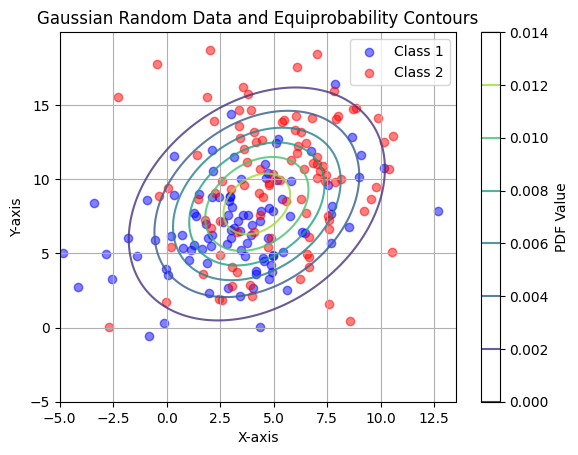

In [17]:
# Create a scatter plot of the generated data points
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(data_1[:, 0], data_1[:, 1], c='b', alpha=0.5, label='Class 1')
ax1.scatter(data_2[:, 0], data_2[:, 1], c='r', alpha=0.5, label='Class 2')

# Eqiprobability Contours
x, y = np.meshgrid(np.linspace(-5, 12, 500), np.linspace(-5, 18, 500))
pos = np.dstack((x, y))
rv = multivariate_normal(mean, covariance)
pdf_values = rv.pdf(pos)
contour = plt.contour(x, y, pdf_values, labels=100, cmap='viridis', alpha=0.8)
plt.colorbar(contour, label='PDF Value')

# Set plot labels and legend
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Gaussian Random Data and Equiprobability Contours')
plt.legend()

# Display plot
plt.grid()
plt.show()